# Classification Uncertainty Analysis in Bayesian Deep Learning with Dropout Variational Inference

Here is [astroNN](https://github.com/henrysky/astroNN), please take a look if you are interested in astronomy or how neural network applied in astronomy
* **Henry Leung** - *Astronomy student, University of Toronto* - [henrysky](https://github.com/henrysky)
* Project adviser: **Jo Bovy** - *Professor, Department of Astronomy and Astrophysics, University of Toronto* - [jobovy](https://github.com/jobovy)
* Contact Henry: henrysky.leung [at] utoronto.ca
* This tutorial is created on 16/Mar/2018 with Keras 2.1.5, Tensorflow 1.6.0, Nvidia CuDNN 7.0 for CUDA 9.0 (Optional)
* Updated on 31/Jan/2020 with Tensorflow 2.1.0, Tensorflow Probability 0.9.0
* Updated on 27/Jan/2020 with Tensorflow 2.4.0, Tensorflow Probability 0.12.0
* Updated on 13/Apr/2023 with Tensorflow 2.12.0, Tensorflow Probability 0.19.0

<br>
For more resources on Bayesian Deep Learning with Dropout Variational Inference, please refer to [README.md](https://github.com/henrysky/astroNN/tree/master/demo_tutorial/NN_uncertainty_analysis)

#### First import everything we need

In [1]:
%matplotlib inline
%config InlineBackend.figure_format="retina"

from keras.datasets import mnist
from keras import utils
import numpy as np
import pylab as plt

from astroNN.models import MNIST_BCNN

### Train the neural network on MNIST training set

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = utils.to_categorical(y_train, 10)
y_train = y_train.astype(np.float32)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

# Create a astroNN neural network instance and set the basic parameter
net = MNIST_BCNN()
net.task = "classification"
net.max_epochs = 5  # Just use 5 epochs for quick result

# Trian the nerual network
net.fit(x_train, y_train)


Number of Training Data: 54000, Number of Validation Data: 6000
====Message from Normalizer====
You selected mode: 255
Featurewise Center: {'input': False, 'input_err': False, 'labels_err': False}
Datawise Center: {'input': False, 'input_err': False, 'labels_err': False} 
Featurewise std Center: {'input': False, 'input_err': False, 'labels_err': False}
Datawise std Center: {'input': False, 'input_err': False, 'labels_err': False} 
====Message ends====
====Message from Normalizer====
You selected mode: 255
Featurewise Center: {'input': False, 'input_err': False, 'labels_err': False}
Datawise Center: {'input': False, 'input_err': False, 'labels_err': False} 
Featurewise std Center: {'input': False, 'input_err': False, 'labels_err': False}
Datawise std Center: {'input': False, 'input_err': False, 'labels_err': False} 
====Message ends====
====Message from Normalizer====
You selected mode: 255
Featurewise Center: {'input': False, 'input_err': False, 'labels_err': False}
Datawise Center: {'

c:\Users\Henry\miniconda3\lib\site-packages\keras\engine\functional.py:639: UserWarning: Input dict contained keys ['input_err', 'labels_err'] which did not match any model input. They will be ignored by the model.


843/843 - 17s - loss: 0.2449 - output_loss: 0.1770 - output_categorical_accuracy: 0.9458 - val_loss: 0.1486 - val_output_loss: 0.0852 - val_output_categorical_accuracy: 0.9730 - lr: 0.0050 - 17s/epoch - 20ms/step
Epoch 2/5
843/843 - 16s - loss: 0.1414 - output_loss: 0.0755 - output_categorical_accuracy: 0.9768 - val_loss: 0.1497 - val_output_loss: 0.0818 - val_output_categorical_accuracy: 0.9766 - lr: 0.0050 - 16s/epoch - 19ms/step
Epoch 3/5
843/843 - 17s - loss: 0.1392 - output_loss: 0.0698 - output_categorical_accuracy: 0.9792 - val_loss: 0.1423 - val_output_loss: 0.0693 - val_output_categorical_accuracy: 0.9824 - lr: 0.0050 - 17s/epoch - 21ms/step
Epoch 4/5
843/843 - 17s - loss: 0.1306 - output_loss: 0.0596 - output_categorical_accuracy: 0.9813 - val_loss: 0.1367 - val_output_loss: 0.0650 - val_output_categorical_accuracy: 0.9802 - lr: 0.0050 - 17s/epoch - 21ms/step
Epoch 5/5
843/843 - 16s - loss: 0.1339 - output_loss: 0.0613 - output_categorical_accuracy: 0.9815 - val_loss: 0.1331 

### Test the neural network on random MNIST images

You can see from below, most test images are right except the last one the model has a high uncertainty in it. As a human, you can indeed can argue this 5 is badly written can can be read as 6 or even a badly written 8.

c:\users\henry\documents\github\astronn\astroNN\models\base_bayesian_cnn.py:611: UserWarning: You are using CPU version Tensorflow, doing 100 times Monte Carlo Inference can potentially be very slow! 
 A possible fix is to decrease the mc_num parameter of the model to do less MC Inference 
This is just a warning, and will not shown if mc_num < 25 on CPU
Prediction progress: 100%|██████████| 6/6 [00:00<00:00,  8.05sample/s, Monte-Carlo=100]


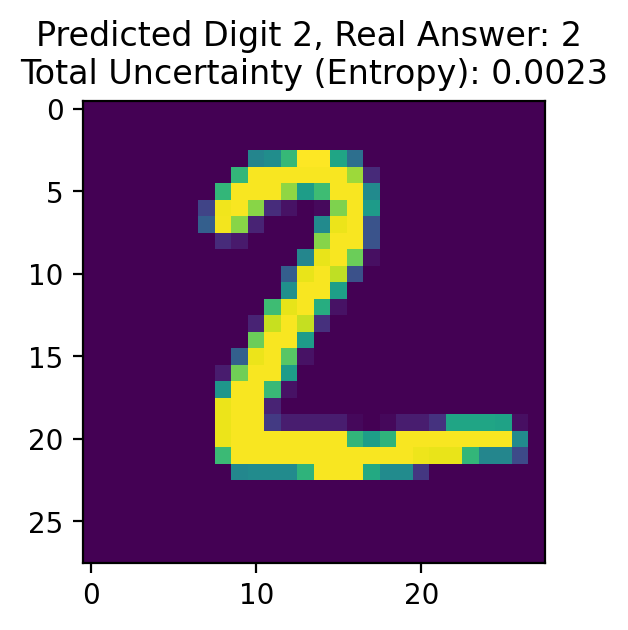

<Figure size 640x480 with 0 Axes>

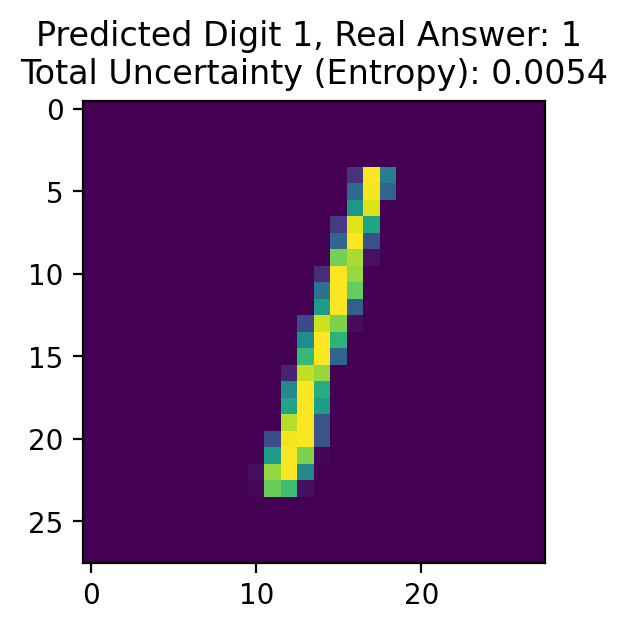

<Figure size 640x480 with 0 Axes>

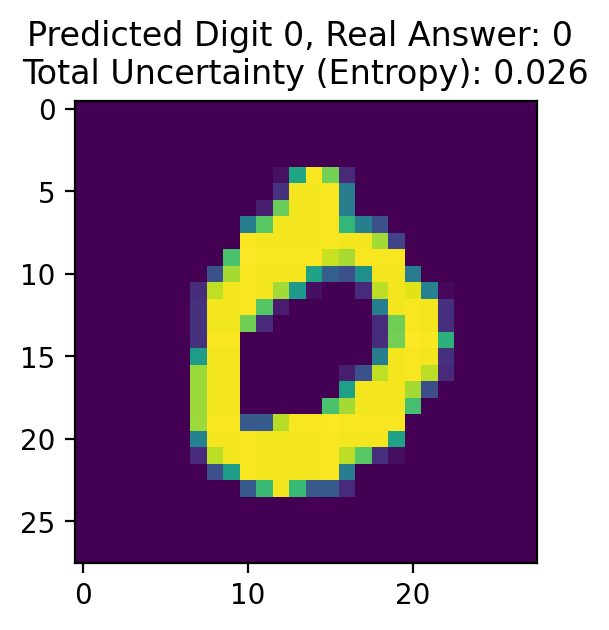

<Figure size 640x480 with 0 Axes>

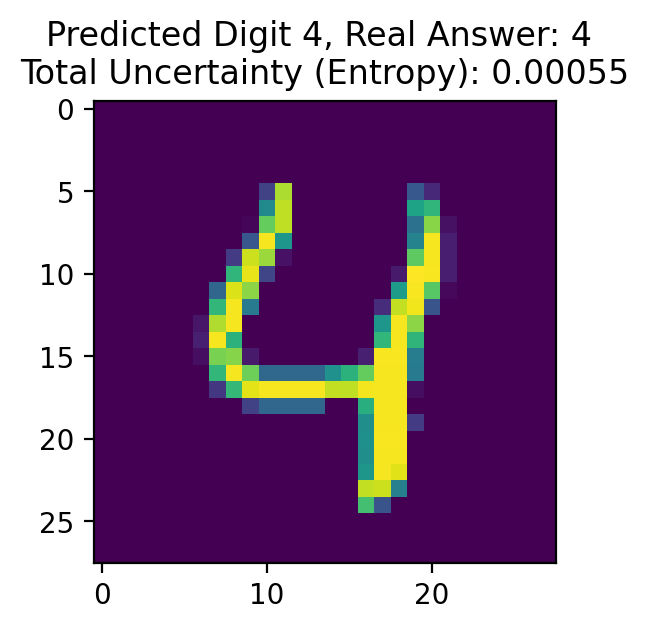

<Figure size 640x480 with 0 Axes>

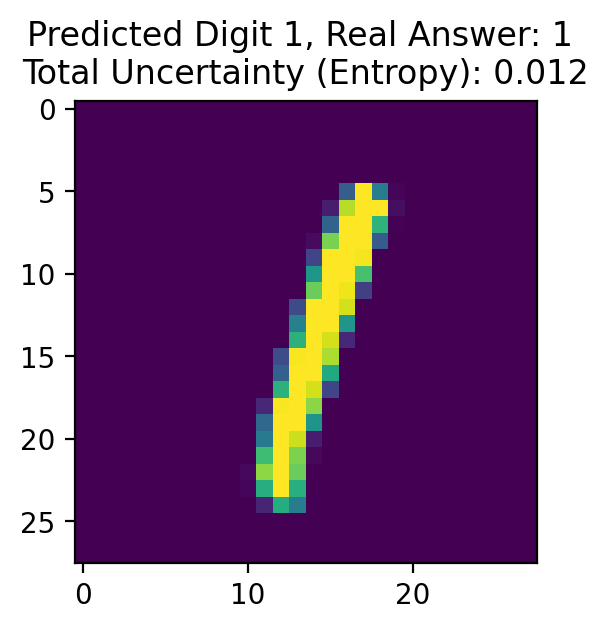

<Figure size 640x480 with 0 Axes>

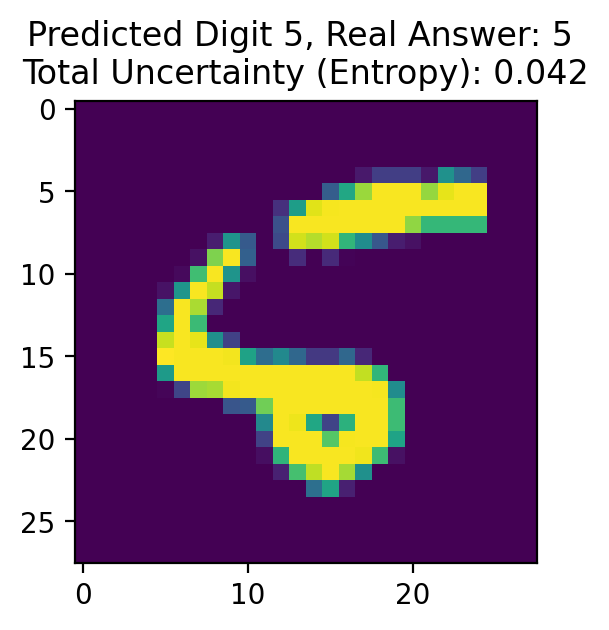

<Figure size 640x480 with 0 Axes>

In [3]:
test_idx = [1, 2, 3, 4, 5, 8]
pred, pred_std = net.predict(x_test[test_idx])
for counter, i in enumerate(test_idx):
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(
        f"Predicted Digit {pred[counter]}, Real Answer: {y_test[i]:{1}} \n"
        f'Total Uncertainty (Entropy): {(pred_std["total"][counter]):.{2}}'
    )
    plt.imshow(x_test[i])
    plt.show()
    plt.close("all")
    plt.clf()


### Test the neural network on random MNIST images with 90 degree rotation

Since the neural network is trained on MNIST images without any data argumentation, so if we rotate the MNIST images, the images should look 'alien' to the neural network and the neural network should give us a high unceratinty. And indeed the neural network tells us its very uncertain about the prediction with roated images.

Prediction progress: 100%|██████████| 3/3 [00:00<00:00,  4.21sample/s, Monte-Carlo=100]


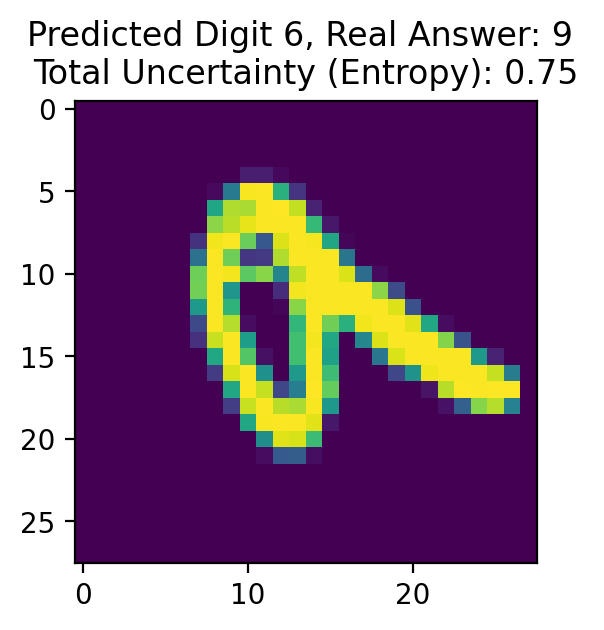

<Figure size 640x480 with 0 Axes>

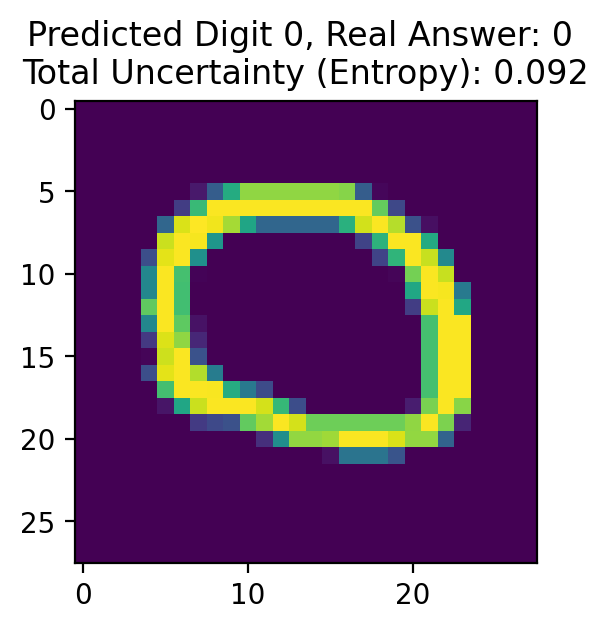

<Figure size 640x480 with 0 Axes>

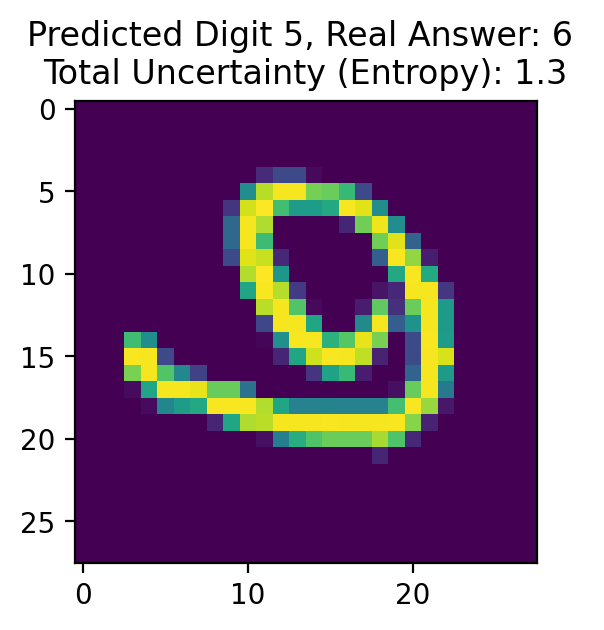

<Figure size 640x480 with 0 Axes>

In [4]:
test_rot_idx = [9, 10, 11]

test_rot = x_test[test_rot_idx]

for counter, j in enumerate(test_rot):
    test_rot[counter] = np.rot90(j)

pred_rot, pred_rot_std = net.predict(test_rot)

for counter, i in enumerate(test_rot_idx):
    plt.figure(figsize=(3, 3), dpi=100)
    plt.title(
        f"Predicted Digit {pred_rot[counter]}, Real Answer: {y_test[i]:{1}} \n"
        f'Total Uncertainty (Entropy): {(pred_rot_std["total"][counter]):.{2}}'
    )
    plt.imshow(test_rot[counter])
    plt.show()
    plt.close("all")
    plt.clf()
